## 1. О котах и печеньках
Сегодня мы посмотрим на данные одной мобильной игрушки под названием "Cookie Cats", разработанной компанией <a href="http://tactile.dk">Tactile Entertainment</a>. Это стандартный match-three пазл, где игрокам нужно соединять элементы одинаковых цветов, чтобы очистить поле и выиграть на уровне. И еще там есть поющие коты. Это важно. 

<p><a href="https://youtu.be/GaP5f0jVTWE"><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cookie_cats_video.jpeg" style="width: 500px"></a></p>

По мере того, как игроки проходят уровни, они встречают ворота-блокеры, которые вынуждают их либо ждать длительное время, либо совершить внутриигровую покупку, чтобы продолжить играть. Помимо того, что эти ворота приносят разработчикам деньги от покупок, они еще и вынуждают игроков делать перерыв, в надежде на то, что те вернутся с новыми силами и снова начнут получать удовольствие от котиков. 

<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png" alt=""></p>

Но возникает вопрос - когда и где ставить эти ворота? Изначально первые ворота стояли на 30-м уровне игры, однако в этом ноутбуке мы будем анализировать АБ-тест, в котором разработчики передвинули ворота на 40-й уровень. В частности мы будем смотреть влияние этого изменения на такой важный показатель как "retention" или удержание игроков, который расчитывается как отношение уникальных игроков, зашедших в игру на 1-й, 2-й, ... N-й день после установки ко всем игрокам, установившим приложение в этот день. 

In [2]:
# Importing pandas
import pandas as pd
# Reading in the data
df = pd.read_csv('data/cookie_cats.csv')

# Showing the first few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
df.shape

(90189, 5)

## Данные для АБ-теста

Итак, собраны данные по 90,189 игроках, которые установили игру во время запущенного теста. У нас есть следующие переменные:

<ul>
<li><code>userid</code> - уникальный номер, идентифицирующий каждого игрока.</li>
<li><code>version</code> - был ли пользователь отнесен к контрольной группе (<code>gate_30</code> - ворота на 30-м уровне) или к тестовой (<code>gate_40</code> - ворота на 40-м уровне).</li>
<li><code>sum_gamerounds</code> - число сессий, сыгранных игроком в течение первых 14 дней после установки игры.</li>
<li><code>retention_1</code> - вернулся ли игрок после <strong>первого</strong> дня с момента установки?</li>
<li><code>retention_7</code> - вернулся ли игрок после <strong>седьмого</strong> дня с момента установки?</li>
</ul>

Когда игрок устанавливает игру, он/она случайным образом относятся либо к группе gate_30, либо gate_40. На всякий случай, давайте проверим, действительно ли их примерно поровну в каждой из группу.

In [4]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


## 3. Распределение числа игровых сессий
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/mr_waffles_smiling.png" style="width:200px; float:left"> </p>
<p>Похоже, что игроков действительно примерно поровну в каждой из групп, отлично!</p>
<p>Фокус нашего анализа будет сосредоточен на удержании игроков (retention), но ради интереса давайте построим распределение числа игровых сессий, сыгранных игроками в течение их первой недели жизни в игре.</p>

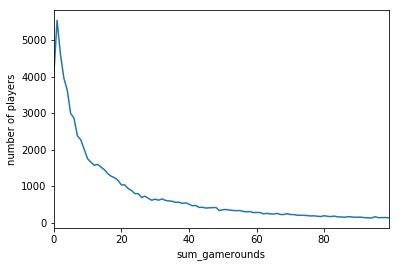

In [5]:
# This command makes plots appear in the notebook
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot()
ax.set_xlabel("sum_gamerounds")
ax.set_ylabel("number of players");

## 4. Общее удержание первого дня (1-day retention)
<p>На графике вверху мы видим, что некоторые игроки установили игру, но даже ни разу не поиграли (0 сессий), многие игроки закончили лишь пару сессий за первую неделю, а некоторые действительно подсели и сыграли более 80 раз!</p>
<p>Конечно, мы хотим, чтобы игроки были заинтересованы в игрушке и возвращались в неё снова и снова. Обычная метрика, использующаяся в гейм-индустрии, чтобы измерить, насколько игрушка веселая и захватывающая, - это <em>удержание первого дня</em> (1-day retention): Процент игроков, которые вренулись и снова стали играть спустя 1 день после установки. Чем выше удержание первого дня, тем проще и дальше удерживать пользователей и строить себе большую базу фанатов.</p>
<p>В качестве первого шага, давайте посмотрим, как в целом выглядит 1-day retention.</p>

In [6]:
df.retention_1.mean()

0.4452095044850259

## 5. 1-day retention по АБ-группам 
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/belle_cookie.png" style="width:200px; float:right"> </p>
<p>Итак, немногим меьше половины всех игроков возвращяются к нам спустя один день после установки. Теперь, когда у нас есть это базовое значение (benchmark), давайте посмотрим, как отличается 1-day retention внутри наших тестовых групп.</p>

In [7]:
df.groupby('version').retention_1.mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

## 6. Должны ли мы быть уверены в разнице? 
<p>Похоже, что у нас есть небольшое ухудшение в удержании первого дня, если мы двигаем ворота к сороковому уровню (44.2%) в сравнеии с контрольной группой, где ворота остались на 30-м уровне (44.8%). Разница, конечно, невелика, но даже маленькие изменений в удержании могут иметь значительные последствия. Однако сейчас мы уверены, что различие есть в наблюдаемых данных, а будет ли вариант с воротами на сороковом уровне хуже в будущем?</p>
<p>Есть несколько способов оценки нашей уверенности в наблюдаемых цифрах. Здесь мы попробуем метод под названием бутстрап (bootstrap). Мы будем последовательно ресэмплить с возвращением наш датасет (то есть выбирать случайную подвыборку из всего множества наблюдений) и для каждой выборки считать удержание первого дня. Дисперсия нашего 1-day retention при таком способе вычисления даст нам указание на то, насколько мы должны быть неуверены в оценках нашего удержания.</p>

In [8]:
iterations = 500

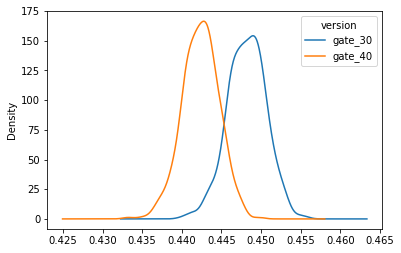

In [9]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(iterations):
    boot_mean = df.sample(frac=1, replace=True).groupby('version').retention_1.mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot.kde();

## 7. Смотрим на разницу поближе
<p>Эти два распределения представляют собой оценку распределений 1-day retention для наших двух АБ-групп. Даже просто визуально понятно, что какое-то доказательство различия двух групп у нас есть. Посмотрим теперь подробнее на разницу в ретеншене у двух групп.</p>
<p>(<em>Чтобы посчиталось быстрее число  итераций мы выбрали достаточно небольшим - всего 500 раз считаем средние по выборкам. В боевых условиях число было бы больше, например, 10 тысяч итераций. </em>)</p>

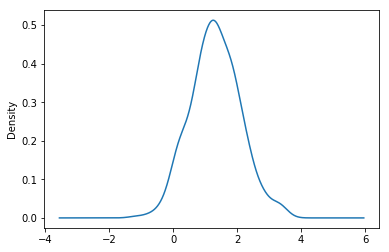

In [10]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d.gate_30-boot_1d.gate_40)/boot_1d.gate_40 * 100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot.kde()

## 8. Вероятность разницы
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/ziggy_smiling.png" style="width:200px; float:left"> </p>
<p>Из этого графика мы видим, что наиболее вероятная разница составляет примерно 1%-2%, а большая часть распределения находится справа от нуля, то есть вариант с воротами на 30 уровне пока выигрывает. Но какова вероятность того, что эта разница больше 0%? Посчитаем и её тоже.</p>

In [11]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff']>0).mean()

# Pretty printing the probability
print('{:.1%}'.format(prob))

95.8%


## 9. 7-day retention по АБ-группам
<p>Бутстрап-анализ свидетельствует о высокой вероятности того, что удержание первого дня лучше в группе с воротами на 30-м уровне, чем на 40-м. Однако, так как игроки упели пожить в игре всего один день, вполне возможно, что их большинство еще даже не дошли даже до 30-го уровня. А значит, многие игроки не будут затронуты нашим изменением и сильного эффекта мы не увидим.</p>
<p>Однако спустя неделю после установки, уже больше игроков пройдут 40 уровней, поэтому имеет смысл посмотреть на удержание седьмого дня. Т.е., какой процент людей, установивших игру, снова показался в игре через 7 дней.</p>
<p>Начнем с рассчета 7-day retention для двух АБ-групп.</p>

In [12]:
# Calculating 7-day retention for both AB-groups
df.groupby('version').retention_7.mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

## 10. Снова бутстрапим разницу 
<p>Как и с 1-day retention, мы видим, что 7-day retention немного ниже (18.2%), когда ворота находятся на 40-м уровне, чем на 30-м (19.0%). Эта разница также выше, чем для удержания первого дня, скорее всего из-за того, что игроки имели больше времени на то, чтобы столкнуться с первыми воротами. Мы также видим, что удержание 7-го дня в целом ниже, чем удержание 1-го - спустя неделю намного меньше людей всё ещё заходит в игру.<p>Но как и раньше, давайте применим бутстрап анализ и выясним, насколько уверены мы должны быть в разнице между двумя АБ-группами.</p>

99.8%


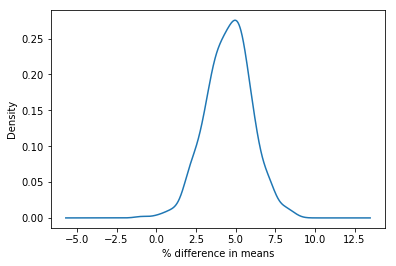

In [13]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version').retention_7.mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)
# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d.gate_30-boot_7d.gate_40)/boot_7d.gate_40 * 100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff']>0).mean()

# Pretty printing the probability
print('{:.1%}'.format(prob))

## 11.  Выводы
<p>Итак, результаты бутстрапа говорят нам о том, что есть значительное доказательство превышения 7-day retentino в группе с воротами на 30-м уровне над группой с воротами на 40-м. Значит, если мы хотим держать ретеншн на высоком уровне и иметь большее число игроков, нам <strong>не нужно</strong> сдвигать ворота с 30-го на 40-й уровень.
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cookie_yellow.png" style="width:100px; float:center"> </p>
<p>Так почему же ретеншн выше, когда ворота расположены раньше? Логично было бы ожидать обратной ситуации - чем позже ставится препятствие, тем дольше игроки будут взаимодействовать с игрой. Однако это не то, что мы видим в данных. Теория гедонистической адаптации может помочь с объяснением. Если вкратце, гедонистическая адаптация - это тенденция получать всё меньше и меньше удовольствия от деятельности, если она продолжается длительное время. Заставляя игроков сделать паузу, когда они достигают 30-го уровня, мы продлеваем им удовольствие от игры, в результате чего они хотят в неё возвращаться. И напротив, сдвигая ворота к 40-му уровню мы даем игрокам возможность наиграться и просто заскучать.</p>